In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/macbook/Downloads/customer_churn.csv")

## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df=df.drop_duplicates()

## Extract the target variable.

In [28]:
df1=df.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'],axis=1)

## Extract the independent variables and scale them.

In [29]:
y=df['Churn']
X = df1.drop('Churn', axis =1)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 220.1 KB


In [60]:
y.shape

(7043,)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

In [49]:
scaler= RobustScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)

In [50]:
X.shape

(7043, 3)

In [51]:
y.shape

(7043,)

## Build the logistic regression model after scaling X columns

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.45, random_state=40)

In [53]:
X_test.shape

(3170, 3)

In [54]:
y_test.shape

(3170,)

In [55]:
classification= LogisticRegression(max_iter=500)

In [56]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [57]:
accuracy_score(y_test,y_test_pred)

0.7902208201892744

In [61]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Even a simple model will give us more than 70% accuracy. Why?

In [62]:
#if no one churn
5174/(5174+1869)
# because it imbalanced data between Yes & No

0.7346301292063041

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
confusion_matrix(y_test,y_test_pred)

array([[2120,  211],
       [ 454,  385]])

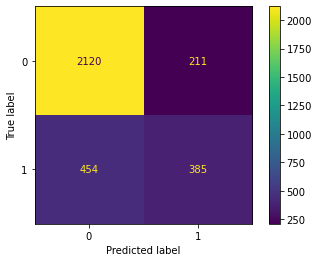

In [66]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [67]:
from imblearn.over_sampling import RandomOverSampler 

In [68]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X_scaled,y)

In [69]:
y_ros.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [80]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 


classification.fit(X_train_ros,y_train_ros)

y_test_pred_ros=classification.predict(X_test_ros)

accuracy_score(y_test_ros, y_test_pred_ros)

0.7272922482284733

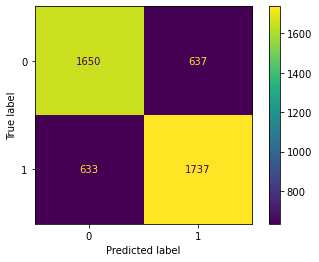

In [81]:
cm_ros=confusion_matrix(y_test_ros,y_test_pred_ros) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm_ros)
disp.plot();

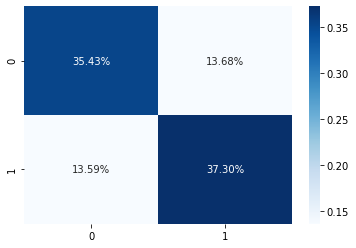

In [72]:
sns.heatmap(cm_ros/np.sum(cm_ros), annot=True, fmt='.2%',cmap='Blues');

## Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [74]:
rus=RandomUnderSampler()
X_rus,y_rus=rus.fit_resample(X_scaled,y)

In [75]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [76]:
y_rus.value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [77]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.45,random_state=40)

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_rus,y_train_rus)

y_test_pred_rus=classification.predict(X_test_rus)

accuracy_score(y_test_rus, y_test_pred_rus)

0.7439096850861556

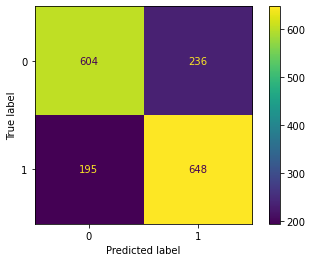

In [78]:
cm_rus=confusion_matrix(y_test_rus,y_test_pred_rus) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot();

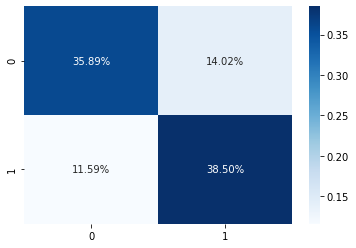

In [79]:
sns.heatmap(cm_rus/np.sum(cm_rus), annot=True, fmt='.2%',cmap='Blues');

In [ ]:
# Synthetic Minority Oversampling TEchnique (SMOTE) has more improment then 